In [2]:
import matplotlib.pyplot as plt
import netsquid as ns
import numpy as np
from scipy.optimize import curve_fit

# 1. Honest prover

In [9]:
from run_honest_prover import honest_distance_error
from run_honest_prover import honest_quantum_error

plt.rcParams.update({'font.size': 12})

## 1.a. Honest prover against SPAM error, measurement error and photon loss

In [ ]:
distance = 10
p_err_no_error, distance, time = honest_distance_error(round=500, distance=50, x=1, y=0, z=3, measurement_error=0, loss_rate=0)
p_err_loss_only, distance, time = honest_distance_error(round=500, distance=50, x=1, y=0, z=3, measurement_error=0, loss_rate=0.2)
p_err_q_only, distance, time = honest_distance_error(round=500, distance=50, x=1, y=0, z=3, measurement_error=0.2, loss_rate=0)
p_err, distance, time = honest_distance_error(round=500, distance=50, x=1, y=0, z=3, measurement_error=0.2, loss_rate=0.2)

plt.figure(dpi=300)
plt.plot(distance, p_err, label='With all constraints', color='#C25759', linewidth=2)
plt.plot(distance, p_err_loss_only, label='Photon loss only', color='black', linewidth=2)
plt.plot(distance, p_err_no_error, label='Without any constraints', color='green', linewidth=2)
plt.legend(loc='best')
plt.xlabel('Distance (km)')
plt.ylabel('Error rate')
plt.ylim(-0.1, 1)

## 1.b. Honest prover v.s. SPAM error and quantum measurement error

In [ ]:
measurement_error = np.linspace(0, 0.5, 50)
p_err_spam = honest_quantum_error(round=500, distance=10, x=1, y=0, z=3, measurement_error=measurement_error, spam=True, me=True, loss_rate=0)
p_err_m = honest_quantum_error(round=500, distance=10, x=1, y=0, z=3, measurement_error=measurement_error, spam=False, loss_rate=0)
p_err_sp = honest_quantum_error(round=500, distance=10, x=1, y=0, z=3, measurement_error=measurement_error, spam=False, me=False, sp=True, loss_rate=0)

In [ ]:
def exp_func(x, a, b):
    return a * np.exp(b * x)

params_spam= np.polyfit(measurement_error, p_err_spam[0], 2)
params_measurement = np.polyfit(measurement_error, p_err_m[0], 2)
poly_params_state_prep = np.polyfit(measurement_error, p_err_sp[0], 2)

y_exp_fit_spam = np.polyval(params_spam, measurement_error)
y_exp_fit_measurement = np.polyval(params_measurement, measurement_error)
y_poly_fit_state_prep = np.polyval(poly_params_state_prep, measurement_error)


In [ ]:
plt.figure(dpi=300)
plt.plot(measurement_error, y_exp_fit_spam, label='SPAM error', color='r', linewidth=2)
plt.plot(measurement_error, y_exp_fit_measurement, label='Measurement error', color='black', linewidth=2)
plt.plot(measurement_error, y_poly_fit_state_prep, label='State Preparation error', linewidth=2)
plt.plot(measurement_error, p_err_spam[0], color='#C25759', alpha=0.3, linewidth=3)
plt.plot(measurement_error, p_err_m[0],  color='black', alpha=0.2, linewidth=3)
plt.plot(measurement_error, p_err_sp[0], color='b', alpha=0.3, linewidth=3)
plt.legend(loc='best')
plt.xlabel('Quantum error probability')
plt.ylabel('Protocol error rate')
plt.ylim(-0.1, 1)

# 2. Run malicious prover

## Random guess

In [ ]:
p_err, distance, time = random_guess(round=100, distance=50, x=1, y=0, z=3, measurement_error=0.2, loss_rate=0)
p_err_h, distance_h, time_h = honest_distance_error(round=100, distance=50, x=1, y=0, z=3, measurement_error=0.2, loss_rate=0)

fig, ax = plt.subplots(nrows=1, ncols=1, dpi=300)
ax.set_ylim(0, 1)
ax.plot(distance, p_err, label='Random Guess')
ax.plot(distance, p_err_h, label='Honest prover')
fig.patches.extend([plt.Rectangle((0.4,0.6),0.48,0.27,
                                  fill=True, color='g', alpha=0.2,
                                  transform=fig.transFigure, figure=fig)])
plt.legend(loc='best')
plt.show()

In [ ]:
array = np.linspace(0, 1, 20)
for i in array:
    print(i)

/Users/zhangziyan/miniconda3/envs/myX86/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3508: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/zhangziyan/miniconda3/envs/myX86/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3508: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


<Figure size 1000x600 with 0 Axes>

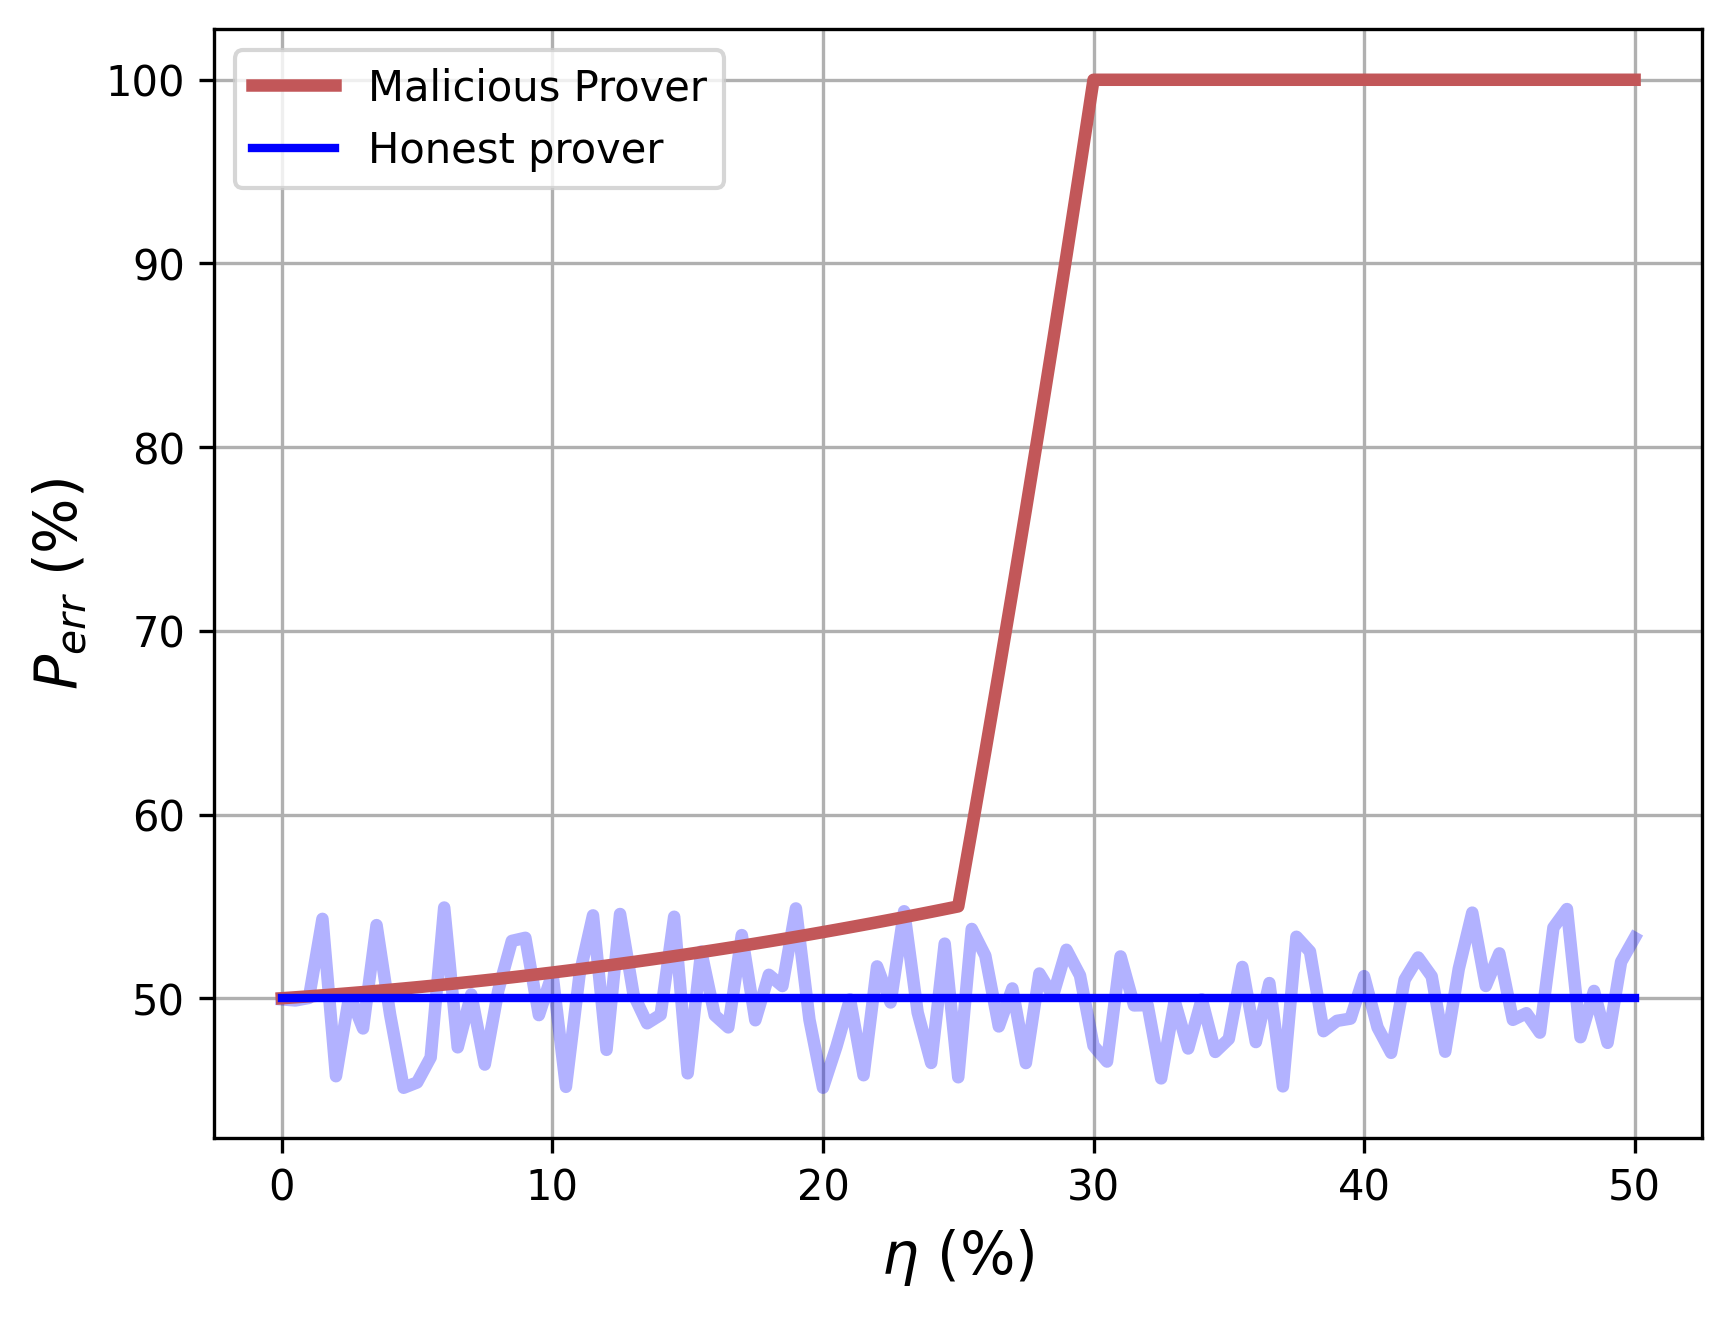

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Define the eta range from 0% to 50%
eta = np.linspace(0, 0.5, 101)

honest_prover = np.full_like(eta, 0.5) + (np.random.rand(len(eta)) - 0.5) * 0.1  # Fluctuate around 50%
honest_prover_fitted = np.full_like(eta, 0.5)

# Define the points for the malicious prover
malicious_points_eta = np.array([0, 0.25, 0.3])
malicious_points_perr = np.array([0.5, 0.55, 1.0])

# Fit a piecewise curve through the points
eta_first_segment = eta[eta <= 0.25]
eta_second_segment = eta[eta > 0.25]

# First segment: quadratic fit from (0, 50%) to (25, 55%)
coefficients_first = np.polyfit(malicious_points_eta[:2], malicious_points_perr[:2], 2)
malicious_curve_first = np.polyval(coefficients_first, eta_first_segment)

# Second segment: quadratic fit from (25, 55%) to (30, 100%)
coefficients_second = np.polyfit(malicious_points_eta[1:], malicious_points_perr[1:], 2)
malicious_curve_second = np.polyval(coefficients_second, eta_second_segment)

# Combine the segments
malicious_curve = np.concatenate((malicious_curve_first, malicious_curve_second))

# Ensure the error rate does not exceed 100%
malicious_curve = np.clip(malicious_curve, 0.5, 1.0)

# Plot the data
plt.figure(figsize=(10, 6))
plt.figure(dpi=300)
plt.plot(eta * 100, honest_prover * 100, color='blue', alpha=0.3, linewidth=3)
plt.plot(eta * 100, malicious_curve * 100, label='Malicious Prover', color='#C25759', linewidth=3)
plt.plot(eta * 100, honest_prover_fitted * 100, label='Honest prover', color='blue', linewidth=2)

# Label the axes
plt.xlabel(r'$\eta$ (%)', fontsize=14)
plt.ylabel(r'$P_{err}$ (%)', fontsize=14)

# Add a legend
plt.legend()

# Add grid lines
plt.grid(True)

# Set x-axis ticks as integers from 0% to 50%
plt.xticks(np.arange(0, 51, 10))
# Show the plot
plt.show()


In [7]:
eta = np.linspace(0, 0.5, 101)
eta


array([0.   , 0.005, 0.01 , 0.015, 0.02 , 0.025, 0.03 , 0.035, 0.04 ,
       0.045, 0.05 , 0.055, 0.06 , 0.065, 0.07 , 0.075, 0.08 , 0.085,
       0.09 , 0.095, 0.1  , 0.105, 0.11 , 0.115, 0.12 , 0.125, 0.13 ,
       0.135, 0.14 , 0.145, 0.15 , 0.155, 0.16 , 0.165, 0.17 , 0.175,
       0.18 , 0.185, 0.19 , 0.195, 0.2  , 0.205, 0.21 , 0.215, 0.22 ,
       0.225, 0.23 , 0.235, 0.24 , 0.245, 0.25 , 0.255, 0.26 , 0.265,
       0.27 , 0.275, 0.28 , 0.285, 0.29 , 0.295, 0.3  , 0.305, 0.31 ,
       0.315, 0.32 , 0.325, 0.33 , 0.335, 0.34 , 0.345, 0.35 , 0.355,
       0.36 , 0.365, 0.37 , 0.375, 0.38 , 0.385, 0.39 , 0.395, 0.4  ,
       0.405, 0.41 , 0.415, 0.42 , 0.425, 0.43 , 0.435, 0.44 , 0.445,
       0.45 , 0.455, 0.46 , 0.465, 0.47 , 0.475, 0.48 , 0.485, 0.49 ,
       0.495, 0.5  ])

/tmp/ipykernel_2062/286995712.py:20: RankWarning: Polyfit may be poorly conditioned
  coefficients_first = np.polyfit(malicious_points_eta[:2], malicious_points_perr[:2], 2)
/tmp/ipykernel_2062/286995712.py:24: RankWarning: Polyfit may be poorly conditioned
  coefficients_second = np.polyfit(malicious_points_eta[1:], malicious_points_perr[1:], 2)


<Figure size 1000x600 with 0 Axes>

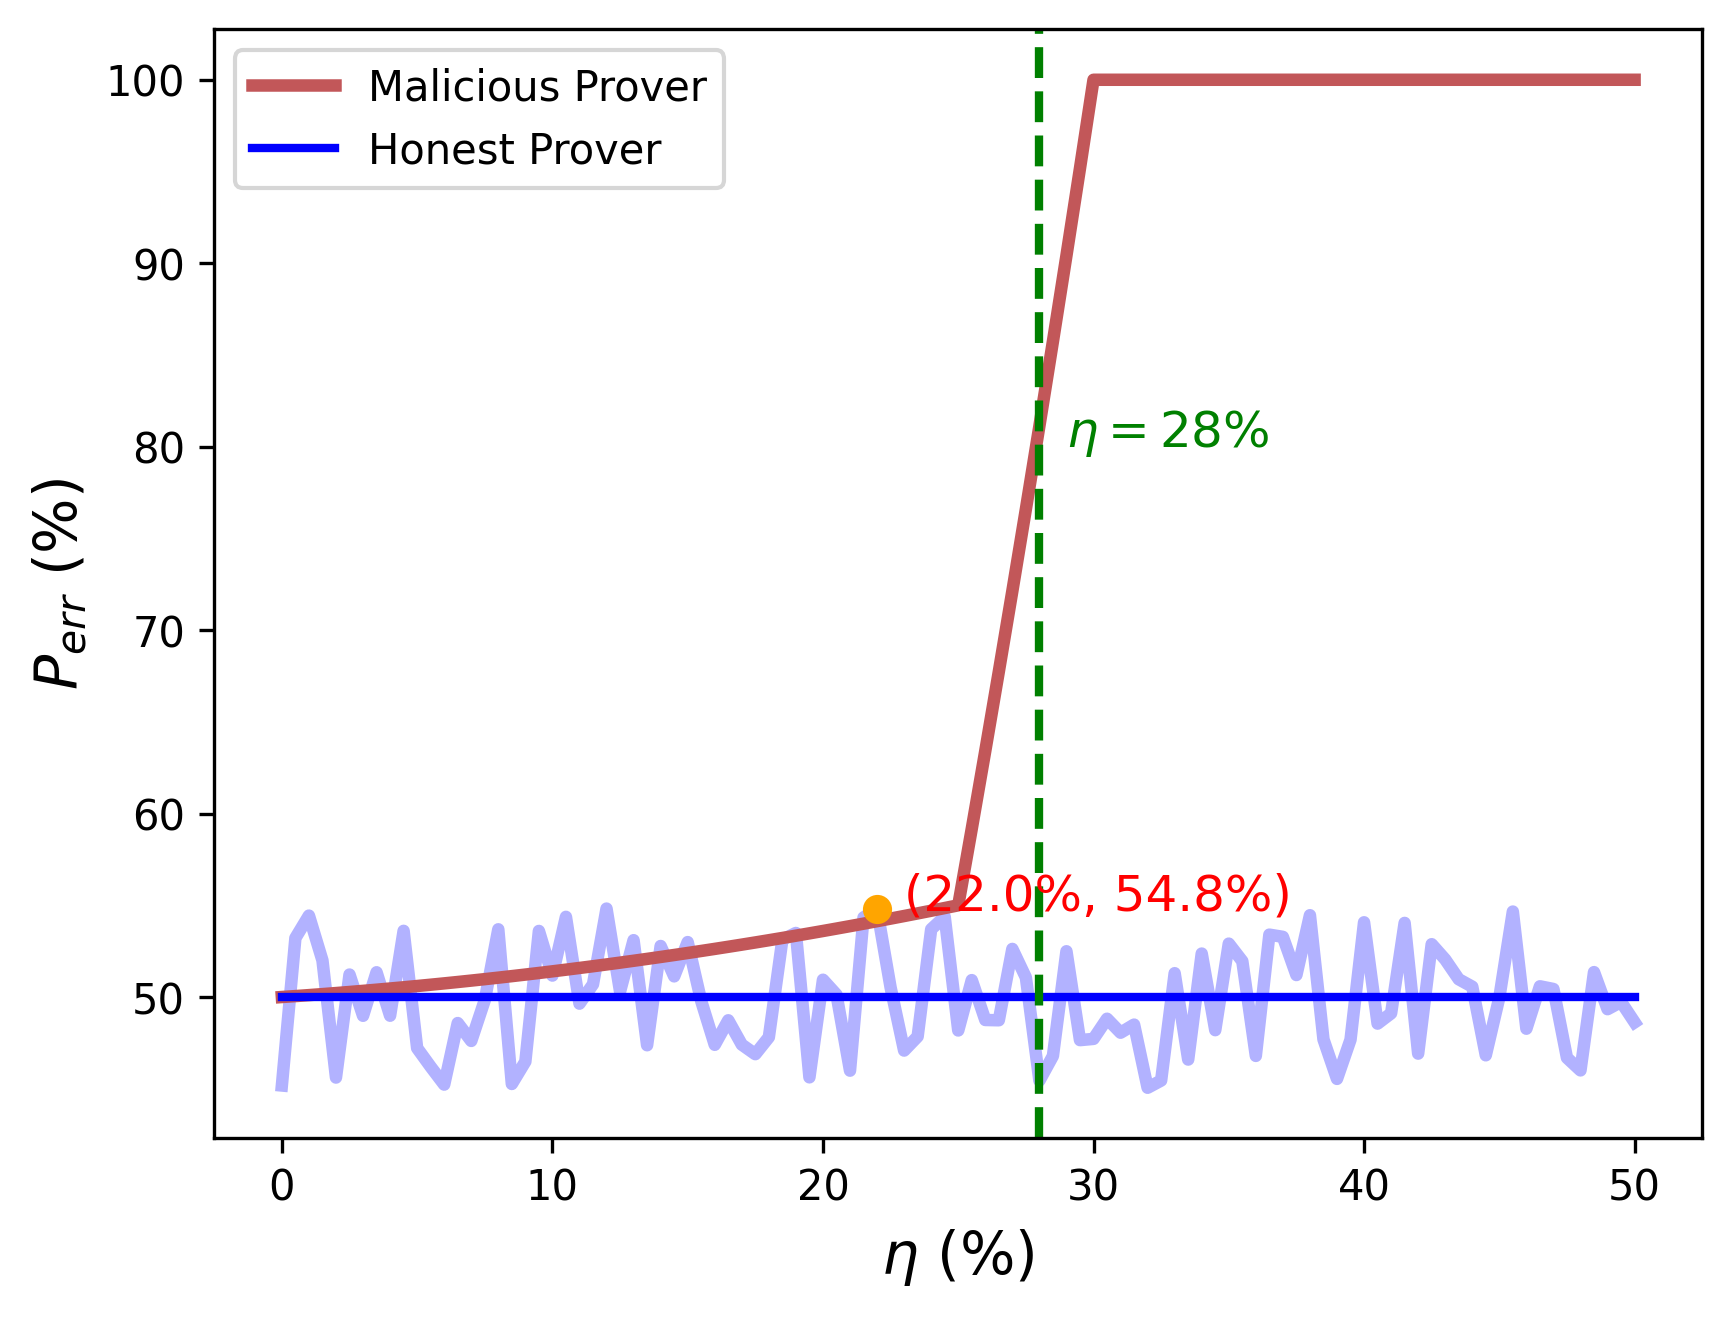

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# 定义 eta 范围从 0% 到 50%
eta = np.linspace(0, 0.5, 101)

# 诚实的证明者的误差率，波动在 50% 附近
honest_prover = np.full_like(eta, 0.5) + (np.random.rand(len(eta)) - 0.5) * 0.1  # Fluctuate around 50%
honest_prover_fitted = np.full_like(eta, 0.5)

# 恶意证明者的误差率的关键点
malicious_points_eta = np.array([0, 0.25, 0.3])
malicious_points_perr = np.array([0.5, 0.55, 1.0])

# 通过这些点拟合分段曲线
eta_first_segment = eta[eta <= 0.25]
eta_second_segment = eta[eta > 0.25]

# 第一段：从 (0, 50%) 到 (25, 55%) 的二次拟合
coefficients_first = np.polyfit(malicious_points_eta[:2], malicious_points_perr[:2], 2)
malicious_curve_first = np.polyval(coefficients_first, eta_first_segment)

# 第二段：从 (25, 55%) 到 (30, 100%) 的二次拟合
coefficients_second = np.polyfit(malicious_points_eta[1:], malicious_points_perr[1:], 2)
malicious_curve_second = np.polyval(coefficients_second, eta_second_segment)

# 组合两段曲线
malicious_curve = np.concatenate((malicious_curve_first, malicious_curve_second))

# 确保误差率不超过 100%
malicious_curve = np.clip(malicious_curve, 0.5, 1.0)

# 找到 malicious_curve 与 honest prover 的相交点
intersection_indices = np.where(np.diff(np.sign(malicious_curve - honest_prover)))[0]
if intersection_indices.size > 0:
    max_intersection_index = intersection_indices[-1]
    eta_intersection = eta[max_intersection_index]
    perr_intersection = honest_prover[max_intersection_index]
else:
    eta_intersection = None

# 绘制数据
plt.figure(figsize=(10, 6))
plt.figure(dpi=300)
plt.plot(eta * 100, honest_prover * 100, color='blue', alpha=0.3, linewidth=3)
plt.plot(eta * 100, malicious_curve * 100, label='Malicious Prover', color='#C25759', linewidth=3)
plt.plot(eta * 100, honest_prover_fitted * 100, label='Honest Prover', color='blue', linewidth=2)

# 标注坐标轴
plt.xlabel(r'$\eta$ (%)', fontsize=14)
plt.ylabel(r'$P_{err}$ (%)', fontsize=14)

# 添加图例
plt.legend()

# 设置 x 轴刻度为从 0% 到 50% 的整数
plt.xticks(np.arange(0, 51, 10))

# 标记 eta = 28% 的地方
eta_28 = 0.28
plt.axvline(x=eta_28 * 100, color='green', linestyle='--', linewidth=2)
plt.text(eta_28 * 100 + 1, 80, r'$\eta=28\%$', color='green', fontsize=12)

# 如果找到相交点，绘制相交点
if eta_intersection is not None:
    plt.scatter(eta_intersection * 100, perr_intersection * 100, color='orange', zorder=5)
    plt.text(eta_intersection * 100 + 1, perr_intersection * 100, f'({eta_intersection * 100:.1f}%, {perr_intersection * 100:.1f}%)', color='red', fontsize=12)

# 显示图表
plt.show()
